# Image compression using K-Means Clustering

The colors in the image are reduced to either 16 or 8 using K-Means clustering algorithm. Intuitive application for the the algorithm, to reduce colors to cluster centroids.

The image is unaltered original image, which is converted to 8 color format on the right.
<div>
    <h3>Original</h3>
    <img src="test_image.jpeg" width="425"/> 
    <h3>Converted</h3>
    <img src="out_8_bit.png" width="425"/> 
</div>

In [28]:
# import required libraries
import cv2
import numpy as np
from sklearn.cluster import KMeans
import skimage

The image is loaded and flattened by dividing with 255 since each channel is represented from 0-255


In [2]:
im = cv2.imread("test_image.jpeg")
im_flat = np.divide(im, 255)

The matrix is reshaped to 2D form from 3D.
The number of colors/clusters to be found is given as K and the kMeans model is fit with the data.


In [24]:
X = im_flat.reshape(-1, 3)

#number of cluster centers
K = 8

kmeans = KMeans(n_clusters=K, random_state=0, verbose=0, max_iter=1).fit(X)

The values of the image are replaced with the values in corresponding cluster centers.

In [25]:
X_recovered = kmeans.cluster_centers_[kmeans.labels_ , :].reshape(im.shape)
X_recovered = X_recovered * 255

<IPython.core.display.Javascript object>


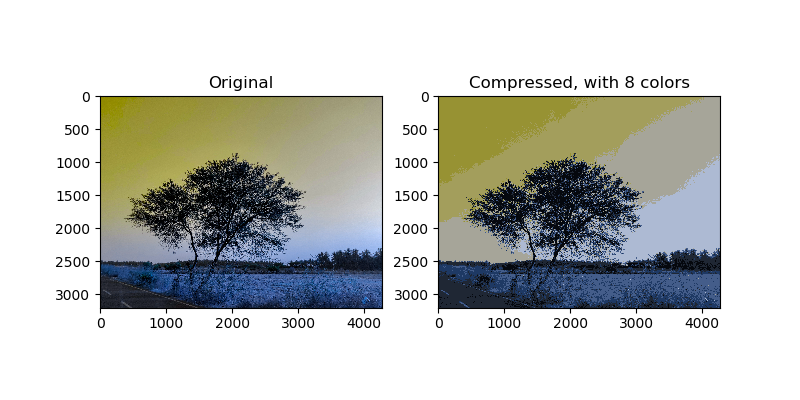

In [26]:
from matplotlib import pyplot
%matplotlib notebook
fig, ax = pyplot.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(im_flat)
ax[0].set_title('Original')
ax[0].grid(False)

ax[1].imshow(X_recovered/255)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)

Write the resultant image out after resizing it to reduce size of the image.

In [30]:
X_resized = skimage.transform.resize(X_recovered, (int(X_recovered.shape[0]/9), int(X_recovered.shape[1]/9)), mode="reflect")
cv2.imwrite("out_" + str(K) + "_bit.png", X_resized)

True